In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import pickle as pkl
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [3]:
with open('data.pkl', 'rb') as f:
    data = pkl.load(f)

data.head()

,HouseSize,HousePrice
0,793,1300000
1,2477,3700000
2,1263,1480000
3,1291,2380000
4,603,955000


In [4]:
X = data['HouseSize'].values.reshape(-1, 1)
y = data['HousePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree=2)': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

In [6]:
report_data = {
    'Model': [],
    'Metric': [],
    'Value': []
}

Linear Regression:
  Mean Squared Error (MSE): 35702944443.25292
  R-squared (R²): 0.9019260271026341
  Mean Absolute Percentage Error (MAPE): 7.22%



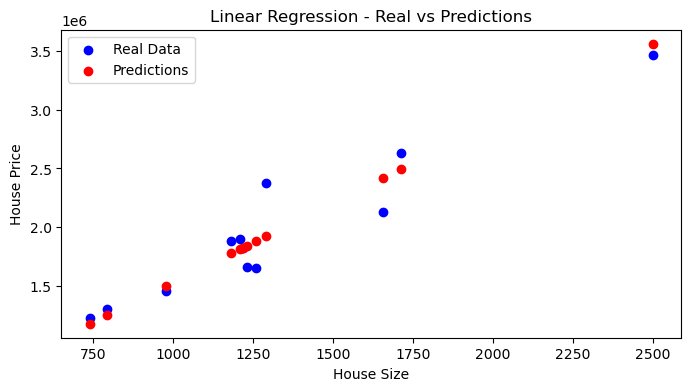

Polynomial Regression (degree=2):
  Mean Squared Error (MSE): 54631820405.59362
  R-squared (R²): 0.8499294733993716
  Mean Absolute Percentage Error (MAPE): 10.19%



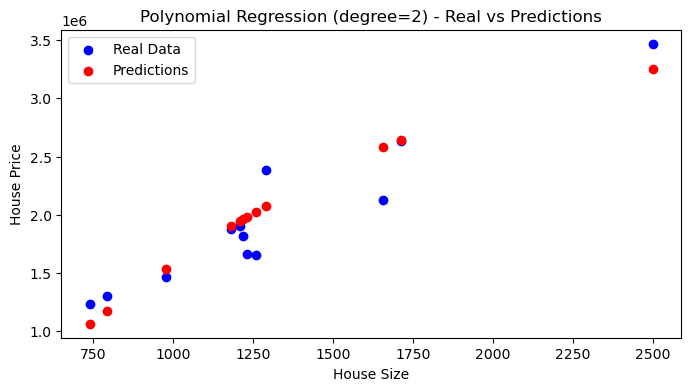

Ridge Regression:
  Mean Squared Error (MSE): 35702941037.606384
  R-squared (R²): 0.9019260364577529
  Mean Absolute Percentage Error (MAPE): 7.22%



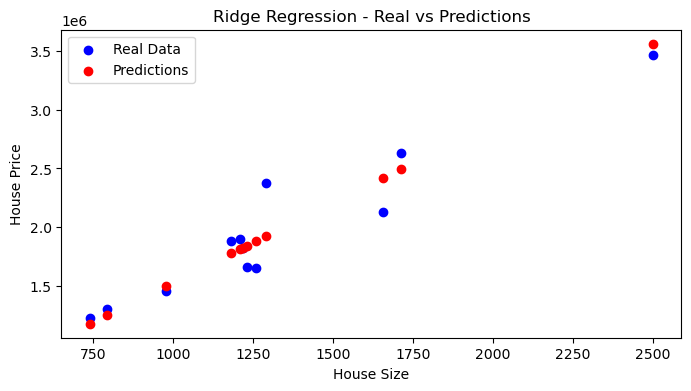

Lasso Regression:
  Mean Squared Error (MSE): 35702944325.15346
  R-squared (R²): 0.9019260274270468
  Mean Absolute Percentage Error (MAPE): 7.22%



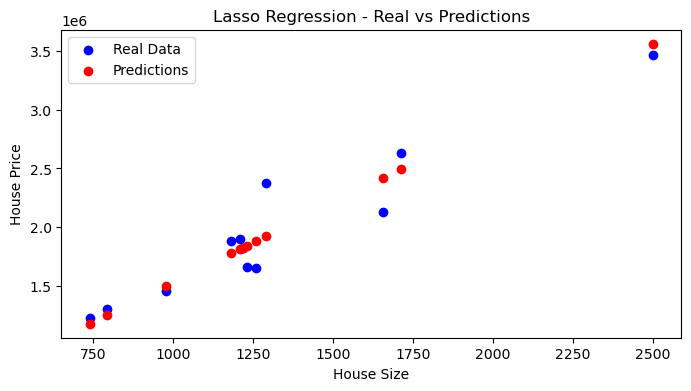

Decision Tree:
  Mean Squared Error (MSE): 94833333333.33333
  R-squared (R²): 0.739498186826498
  Mean Absolute Percentage Error (MAPE): 11.15%



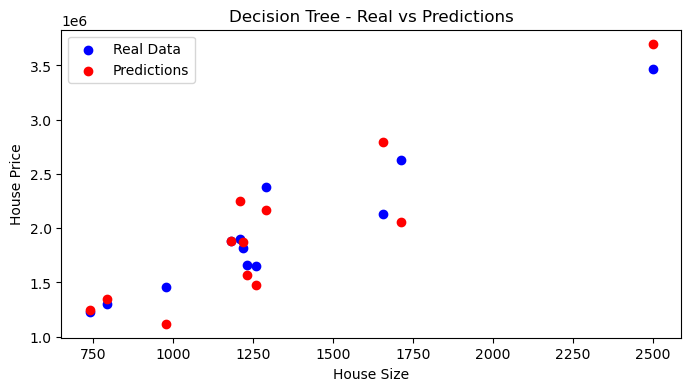

Random Forest:
  Mean Squared Error (MSE): 77301031881.72185
  R-squared (R²): 0.7876584291876497
  Mean Absolute Percentage Error (MAPE): 9.52%



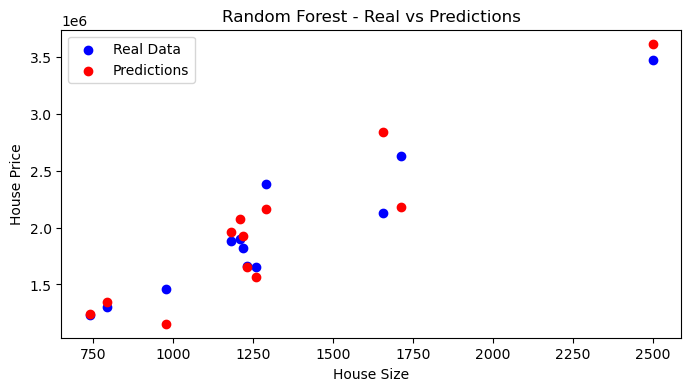

Support Vector Regression:
  Mean Squared Error (MSE): 371984969658.9284
  R-squared (R²): -0.02182171250728593
  Mean Absolute Percentage Error (MAPE): 21.95%



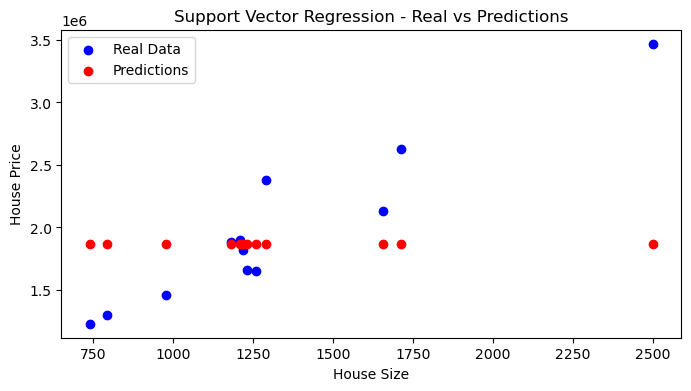

Relatório de desempenho dos modelos salvo com sucesso.


In [7]:
for name, model in models.items():
    if name == 'Polynomial Regression (degree=2)':
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model.fit(X_train_poly, y_train)
        predictions = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    report_data['Model'].extend([name] * 3)
    report_data['Metric'].extend(['Mean Squared Error (MSE)', 'R-squared (R²)', 'Mean Absolute Percentage Error (MAPE)'])
    report_data['Value'].extend([mse, r2, mape * 100])
    
    print(f'{name}:')
    print(f'  Mean Squared Error (MSE): {mse}')
    print(f'  R-squared (R²): {r2}')
    print(f'  Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%\n')

    plt.figure(figsize=(8, 4))
    plt.scatter(X_test, y_test, color='blue', label='Real Data')
    plt.scatter(X_test, predictions, color='red', label='Predictions')
    plt.title(f'{name} - Real vs Predictions')
    plt.xlabel('House Size')
    plt.ylabel('House Price')
    plt.legend()
    plt.show()

# Criar DataFrame do relatório
report_df = pd.DataFrame(report_data)

# Salvar o relatório em um arquivo CSV
report_df.to_csv('model_performance_report_all_models.csv', index=False)

print("Relatório de desempenho dos modelos salvo com sucesso.")